# Predicting STEAM User Engagement

# Exploratory Data Analysis

In [571]:
# Imports 

import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from ast import literal_eval
import datetime
import re
import time
import sys
import json
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [328]:
# reading in the cleaned merged data
df = pd.read_csv('merged_data_clean.csv')

In [329]:
# print out number of rows and columns
print('Data Shape:', df.shape)
print('Data Types:', df.dtypes)

Data Shape: (25232, 32)
Data Types: name                     object
appid                     int64
required_age            float64
free                       bool
detailed_description     object
about_the_game           object
short_description        object
pc_requirements          object
mac_requirements         object
linux_requirements       object
developers               object
publishers               object
package_groups           object
platforms                object
catagories               object
release_date             object
content_descriptors      object
positive                  int64
negative                  int64
userscore                 int64
owners                   object
average_forever           int64
average_2weeks            int64
median_forever            int64
median_2weeks             int64
price                   float64
initialprice            float64
discount                float64
languages                object
genre                    object
ccu 

In [330]:
df.head(4)

,name,appid,required_age,free,detailed_description,about_the_game,short_description,pc_requirements,mac_requirements,linux_requirements,...,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,Team Fortress Classic,20,0.0,False,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,0,19,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action Games,98,"{'Action': 738, 'FPS': 300, 'Multiplayer': 253..."
1,Day of Defeat,30,0.0,False,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,0,47,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action Games,145,"{'FPS': 778, 'World War II': 244, 'Multiplayer..."
2,Deathmatch Classic,40,0.0,False,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,0,4,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action Games,6,"{'Action': 626, 'FPS': 136, 'Classic': 104, 'M..."
3,Half-Life: Opposing Force,50,0.0,False,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,0,123,0,499.0,499.0,0.0,"English, French, German, Korean",Action Games,156,"{'FPS': 871, 'Action': 312, 'Classic': 240, 'S..."


In [331]:
# Check for duplicated rows
duplicated_rows = df[df.duplicated()]

print('Duplicate rows to remove:', duplicated_rows.shape[0])

duplicated_rows.head(2)

Duplicate rows to remove: 0


,name,appid,required_age,free,detailed_description,about_the_game,short_description,pc_requirements,mac_requirements,linux_requirements,...,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags


## Required Age

Looking into the required age feature, there are many outliers. After filling the null values with the age mode, I rebin the age ratings in line with the ERSB rating system. 

https://www.internetmatters.org/resources/video-games-age-ratings-explained/ 

In [332]:
df['required_age'].value_counts().sort_index()

0.0     24338
1.0         1
5.0         1
6.0         3
7.0         2
10.0       16
12.0       17
13.0      115
14.0        2
15.0        6
16.0       45
17.0      550
18.0      134
21.0        2
Name: required_age, dtype: int64

In [333]:
mean = df['required_age'].mean()
mode = df['required_age'].mode()
print(f'Required Age mean:{mean}')
print(f'Required Age mode:{mode}')

Required Age mean:0.576212745719721
Required Age mode:0    0.0
dtype: float64


In [334]:
df['required_age'] = df['required_age'].fillna(0)

In [335]:
# Code refrence from https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas
bins = [-1, 0, 3, 7, 12, 16, 20]
labels = [0, 3, 7, 12, 16, 18]

df['required_age'] = pd.cut(df['required_age'], bins=bins, labels=labels)

In [336]:
df['required_age'].value_counts()

0     24338
18      684
16      168
12       33
7         6
3         1
Name: required_age, dtype: int64

## Languages

In [340]:
# Checking the unique value counts in languages feature
df['languages'].value_counts().head(10)

English                                              12281
English, Russian                                       826
English, Japanese                                      492
English, Simplified Chinese                            462
English, Not supported, Simplified Chinese             364
English, French, Italian, German, Spanish - Spain      347
English, German                                        285
English, French                                        196
English, French, German, Italian, Spanish - Spain      171
English, Simplified Chinese, Traditional Chinese       159
Name: languages, dtype: int64

In [341]:
# changing the variable into a binary feature with english as value 1 and not english with value 0. 
df['english'] = df['languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)

In [342]:
# Checking out the column 
df[['name', 'english']].head()

,name,english
0,Team Fortress Classic,1
1,Day of Defeat,1
2,Deathmatch Classic,1
3,Half-Life: Opposing Force,1
4,Ricochet,1


### Puplisher and Developer

In [343]:
def developer_publisher(df):

      for col in ['developers', 'publishers']:
        df[col] = df[col].apply(lambda x: literal_eval(x))
        
        # filter dataframe to rows with lists longer than 1, and store the number of rows
        num_rows = df[df[col].str.len() > 1].shape[0]
        
        print('Rows in {} column with multiple values:'.format(col), num_rows)

developer_publisher(df)

Rows in developers column with multiple values: 1846
Rows in publishers column with multiple values: 995


In [344]:
df.replace('[]', 'none')

,name,appid,required_age,free,detailed_description,about_the_game,short_description,pc_requirements,mac_requirements,linux_requirements,...,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags,english
0,Team Fortress Classic,20,0,False,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,19,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action Games,98,"{'Action': 738, 'FPS': 300, 'Multiplayer': 253...",1
1,Day of Defeat,30,0,False,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,47,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action Games,145,"{'FPS': 778, 'World War II': 244, 'Multiplayer...",1
2,Deathmatch Classic,40,0,False,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,4,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action Games,6,"{'Action': 626, 'FPS': 136, 'Classic': 104, 'M...",1
3,Half-Life: Opposing Force,50,0,False,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,123,0,499.0,499.0,0.0,"English, French, German, Korean",Action Games,156,"{'FPS': 871, 'Action': 312, 'Classic': 240, 'S...",1
4,Ricochet,60,0,False,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",...,3,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 581, 'FPS': 121, 'Multiplayer': 97,...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25227,Arnold,1505470,0,False,"<img src=""https://cdn.akamai.steamstatic.com/s...","<img src=""https://cdn.akamai.steamstatic.com/s...",Control a spaceship and fight against treacher...,{'minimum': '<strong>Minimum:</strong><br><ul ...,none,none,...,0,0,899.0,899.0,0.0,"English, French, Italian, German, Spanish - Sp...","Action Games, Adventure, Early Access",0,"{'Early Access': 375, 'Action': 340, 'Puzzle':...",1
25228,Mage Hunters,1507640,0,False,The universe is in danger with the threat of e...,The universe is in danger with the threat of e...,Mage Hunters uses capture and elimination mech...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,...,0,0,99.0,99.0,0.0,English,Strategy,0,"{'Strategy': 222, 'Board Game': 213, 'Tabletop...",1
25229,Club Girl,1509350,0,False,<strong>Club Girl</strong> - You only need 4 k...,<strong>Club Girl</strong> - You only need 4 k...,"A classic game, you need to press the arrow ke...",{'minimum': '<strong>Minimum:</strong><br><ul ...,none,none,...,0,0,99.0,99.0,0.0,English,"Casual, Indie, Simulation",0,"{'Casual': 70, 'Simulation': 62, 'Rhythm': 62,...",1
25230,Bloks,1515040,0,False,<strong>bloks </strong>is a small god-game wit...,<strong>bloks </strong>is a s

In [345]:
# Dropping  more columns that will not be needed
df.drop(columns=['detailed_description', 'about_the_game', 'languages'], inplace=True)

##  Free or paid

In [347]:
# leaving the Free feature as is for now
df['free'].value_counts()

False    21304
True      3928
Name: free, dtype: int64

## Release Date

The release date column looks like a dictionary but after trying different ways to change the column into datetime, it turned out that the column values are in strings. The loop iterrates through each row to change the values into date number that will be easier to perform EDA on and for the model to potenially read. While going through the rows, the loop will fill any missing value with "Missing". 

In [349]:
df['release_date'].head()

0    {'coming_soon': False, 'date': 'Apr 1, 1999'}
1    {'coming_soon': False, 'date': 'May 1, 2003'}
2    {'coming_soon': False, 'date': 'Jun 1, 2001'}
3    {'coming_soon': False, 'date': 'Nov 1, 1999'}
4    {'coming_soon': False, 'date': 'Nov 1, 2000'}
Name: release_date, dtype: object

In [311]:
#df = df[~df['name'].isin(['Left 4 Dead 2'])]

In [312]:
#df = df[~df['appid'].isin(['13620'])]

In [449]:
# Change the date data type looop 
df2=df
count=0
for index,row in df2.iterrows():
    #print(index)
    try:
        tmpvar=row['release_date'].split(':')[2]
    except IndexError:
        continue
    tmp_baddate=tmpvar.split("'")[1]
    if not tmp_baddate:
        correct_date_string="MISSING"
    else:
        try:
            temp_date=datetime.datetime.strptime(tmp_baddate,'%b %d, %Y')
            correct_date_string=temp_date.strftime("%Y%m%d")
        except:
            temp_date=None
        
        if not temp_date:
            try:
                temp_date=datetime.datetime.strptime(tmp_baddate,'%d %b, %Y')
                correct_date_string=temp_date.strftime("%Y%m%d")
            except:
                correct_date_string="MISSING"
    df2.at[index,'release_date']=correct_date_string
    count=count+1

In [471]:
# checking out the column to make sure it's correct 
df['release_date'].head()

0    19990401
1    20030501
2    20010601
3    19991101
4    20001101
Name: release_date, dtype: object

In [473]:
# dropping package_groups
df.drop(columns=['package_groups'],inplace=True)

In [474]:
df.head()

,name,appid,required_age,free,short_description,pc_requirements,mac_requirements,linux_requirements,developers,publishers,...,average_forever,average_2weeks,median_forever,median_2weeks,price,discount,genre,ccu,tags,english
0,Team Fortress Classic,20,0.0,False,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,92,0,19,0,499.0,0.0,Action Games,98,"{'Action': 738, 'FPS': 300, 'Multiplayer': 253...",1
1,Day of Defeat,30,0.0,False,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,299,0,47,0,499.0,0.0,Action Games,145,"{'FPS': 778, 'World War II': 244, 'Multiplayer...",1
2,Deathmatch Classic,40,0.0,False,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,23,0,4,0,499.0,0.0,Action Games,6,"{'Action': 626, 'FPS': 136, 'Classic': 104, 'M...",1
3,Half-Life: Opposing Force,50,0.0,False,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Gearbox Software'],['Valve'],...,218,0,123,0,499.0,0.0,Action Games,156,"{'FPS': 871, 'Action': 312, 'Classic': 240, 'S...",1
4,Ricochet,60,0.0,False,A futuristic action game that challenges your ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,23,0,3,0,499.0,0.0,Action,8,"{'Action': 581, 'FPS': 121, 'Multiplayer': 97,...",1


## Owners 

To handle the owners feature, I first tried it out as a string that represents the range of owners just eaiser to read. But because it might be easier to handle this columns as a numerical feature, instead I leave only the first index value and drop the rest and turn it into an interger type. 

In [487]:
df['owners'] = df['owners'].str.replace(',', '').str.replace(' .. ', '-')

In [492]:
df['owners'].head(40)

0         2000000-5000000
1        5000000-10000000
2           100000-200000
3        5000000-10000000
4        5000000-10000000
5        5000000-10000000
6        5000000-10000000
7         1000000-2000000
8       10000000-20000000
9       10000000-20000000
10        2000000-5000000
11       5000000-10000000
12      10000000-20000000
13      10000000-20000000
14       5000000-10000000
15       5000000-10000000
16       5000000-10000000
17       5000000-10000000
18     50000000-100000000
19       5000000-10000000
20      20000000-50000000
21    100000000-200000000
22      10000000-20000000
23        1000000-2000000
24    100000000-200000000
25                0-20000
26         500000-1000000
27        2000000-5000000
28          100000-200000
29           50000-100000
30          200000-500000
31         500000-1000000
32         500000-1000000
33         500000-1000000
34           50000-100000
35           50000-100000
36           50000-100000
37          100000-200000
38          

In [828]:
df['owners'].astype('category')

0         2000000-5000000
1        5000000-10000000
2           100000-200000
3        5000000-10000000
4        5000000-10000000
               ...       
25227             0-20000
25228             0-20000
25229             0-20000
25230             0-20000
25231             0-20000
Name: owners, Length: 25232, dtype: category
Categories (13, object): ['0-20000', '100000-200000', '1000000-2000000', '10000000-20000000', ..., '50000-100000', '500000-1000000', '5000000-10000000', '50000000-100000000']

In [830]:
df['owners'] = df['owners'].str.split('-').apply(lambda x: x[0]).astype(int)

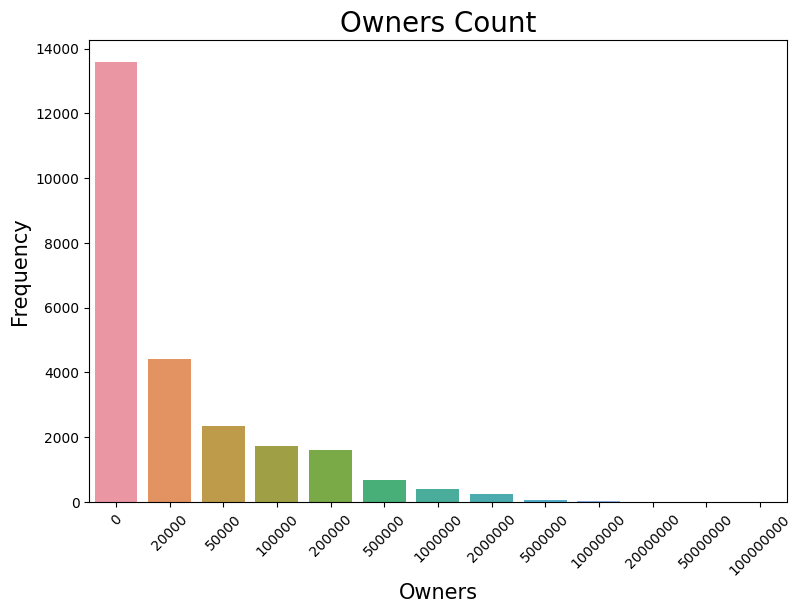

In [942]:
# Looking at the number owners
_, ax = plt.subplots(figsize=(9, 6))
sns.countplot(data = df2, x = 'owners');
plt.xlabel("Owners", size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("Frequency", size=15)
plt.title('Owners Count', size=20);

## Release Year

Creating a column pulling only the year from released date column. 

In [831]:
df = df[~df['release_date'].isin(['MISSING'])]

In [832]:
 # convert release_date to datetime type and create separate column for release_year
df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['release_year'] = df['release_date'].apply(lambda x: x.year)

In [833]:
df.head()

,name,appid,required_age,free,short_description,pc_requirements,mac_requirements,linux_requirements,developers,publishers,...,average_2weeks,median_forever,median_2weeks,price,discount,genre,ccu,tags,english,release_year
0,Team Fortress Classic,20,0.0,False,One of the most popular online action games of...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,0,19,0,499.0,0.0,Action Games,98,"{'Action': 738, 'FPS': 300, 'Multiplayer': 253...",1,1999
1,Day of Defeat,30,0.0,False,Enlist in an intense brand of Axis vs. Allied ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,0,47,0,499.0,0.0,Action Games,145,"{'FPS': 778, 'World War II': 244, 'Multiplayer...",1,2003
2,Deathmatch Classic,40,0.0,False,Enjoy fast-paced multiplayer gaming with Death...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,0,4,0,499.0,0.0,Action Games,6,"{'Action': 626, 'FPS': 136, 'Classic': 104, 'M...",1,2001
3,Half-Life: Opposing Force,50,0.0,False,Return to the Black Mesa Research Facility as ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Gearbox Software'],['Valve'],...,0,123,0,499.0,0.0,Action Games,156,"{'FPS': 871, 'Action': 312, 'Classic': 240, 'S...",1,1999
4,Ricochet,60,0.0,False,A futuristic action game that challenges your ...,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...",['Valve'],['Valve'],...,0,3,0,499.0,0.0,Action,8,"{'Action': 581, 'FPS': 121, 'Multiplayer': 97,...",1,2000


<AxesSubplot:>

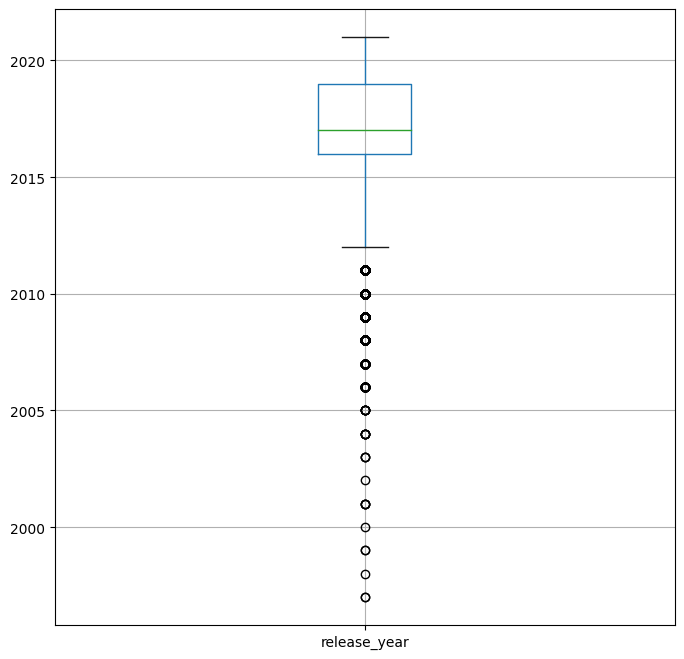

In [943]:
# Boxplot for release year
plt.figure(figsize=(8,8))
df2.boxplot('release_year')

## Ratings: Positive and Negative

In [834]:
# calculate rating, as well as simple ratio for comparison
df['total_ratings'] = df['positive'] + df['negative']

In [835]:
df['rating_ratio'] = df['positive'] / df['total_ratings']

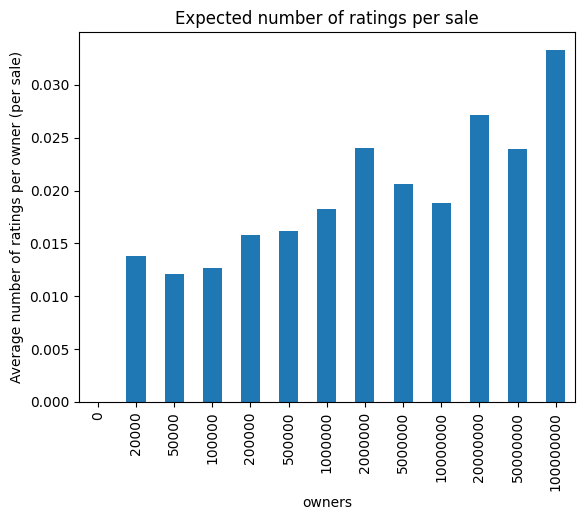

In [838]:
grp = df.groupby('owners')

ax = (grp['total_ratings'].mean() / sorted(df['owners'].unique())).plot.bar()
ax.set_ylabel('Average number of ratings per owner (per sale)')
ax.set_title('Expected number of ratings per sale');

## Genres

Checking all the unique values in the genre column, and because there are so many I decided to remap it into only a few different genre categories. After it's remapped, We check the count of the new values in the graph. Action is the most frequent value in our dataset. I dummify the feature for now to see how it fits into the model 

In [840]:
df['genre'].nunique()

1570

In [841]:
df['genre'].value_counts()

Action Games, Indie                                                                   1161
Casual, Indie                                                                         1121
Adventure, Indie                                                                      1093
Action Games, Adventure, Indie                                                         750
Adventure, Casual, Indie                                                               716
                                                                                      ... 
Action Games, Free to Play, Indie, Massively Multiplayer, Simulation, Early Access       1
Massively Multiplayer, Racing                                                            1
Action, Adventure, Casual, Indie, Racing, RPG, Simulation, Sports                        1
Adventure, Casual, Free to Play, Massively Multiplayer, Strategy                         1
Indie, Utilities                                                                         1

In [842]:
df['genre'] = df['genre'].str.split(',').apply(lambda x: x[0])

In [844]:
df['genre'].value_counts()

Action Games             6982
Adventure                5134
Casual                   3857
Action                   3719
Indie                    2368
Free to Play              622
Simulation                618
Strategy                  537
RPG                       433
Racing                    195
Animation & Modeling      141
Utilities                 116
Sports                     83
Design & Illustration      61
Education                  61
Audio Production           50
Violent                    32
Massively Multiplayer      30
Sexual Content             14
Video Production           14
Software Training          11
Early Access               10
Nudity                      9
Game Development            6
Photo Editing               5
Web Publishing              5
Gore                        5
Accounting                  4
Name: genre, dtype: int64

In [845]:
df["genres"] = df["genre"].map({"Action Games":"Action", "Adventure":"Adventure", "Casual":"Casual", 'Action':"Action", 'Indie':'Indie', 'Free to Play':'Free to Play', "Simulation":"Simulation","RPG":"RPG",
                               "Racing":"Sports", "Animation & Modeling":"Other", "Utilities":"Other", "Sports":"Sports", "Design & Illustration":"Other", "Education":"Other", "Design & Illustration":"Other",
                               "Violent":"Other", "Massively Multiplayer":"Other", "Sexual Content":"Other", "Video Production":"Other", "Software Training":"Other", "Early Access":"Other", "Nudity":"Other",
                               "Game Development":"Other", "Photo Editing":"Other", "Web Publishing":"Other", "Gore":"Other", "Accounting":"Other"})

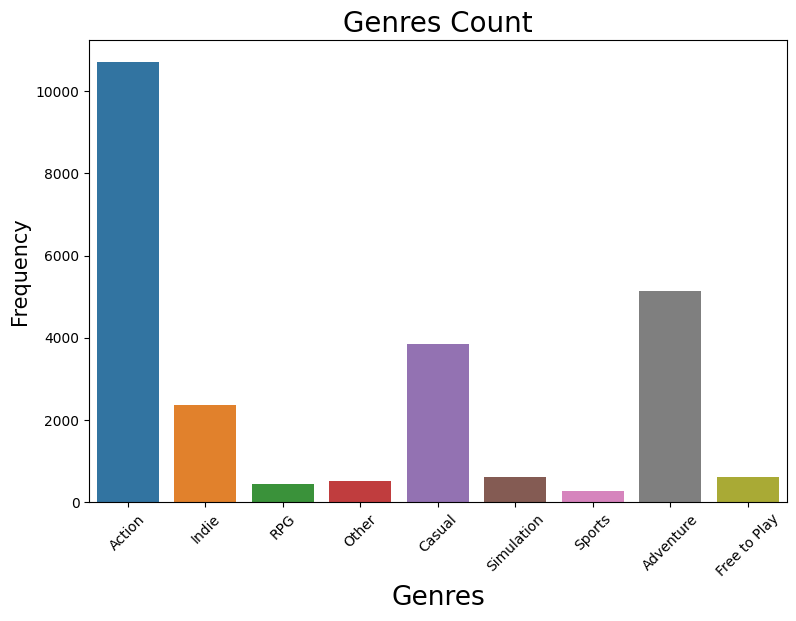

In [847]:
# Looking at the number of fatal encounters by race and male/female. 
_, ax = plt.subplots(figsize=(9, 6))
sns.countplot(data = df, x = 'genres');
plt.xlabel("Genres", size=19)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("Frequency", size=15)
plt.title('Genres Count', size=20);

In [848]:
df = pd.get_dummies(data=df, columns = ['genres'], drop_first=False)

## Puplishers

The column with the publishers feature has multiple values so to again keep it simpler, I pull only the first value and drop everything else in the string. 

In [851]:
df2['publishers'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       ['Valve']
1                       ['Valve']
2                       ['Valve']
3                       ['Valve']
4                       ['Valve']
                   ...           
25117    ['FreeAnimals_Software']
25118           ['TooIzzi Games']
25119            ['sixteen bars']
25120       ['Sokpop Collective']
25121       ['Sokpop Collective']
Name: publishers, Length: 25122, dtype: object>

In [852]:
df2['publishers_fixed'] = df2['publishers'].str.split("'").apply(lambda x: x[1])

In [853]:
df2['publishers_fixed']

0                       Valve
1                       Valve
2                       Valve
3                       Valve
4                       Valve
                 ...         
25117    FreeAnimals_Software
25118           TooIzzi Games
25119            sixteen bars
25120       Sokpop Collective
25121       Sokpop Collective
Name: publishers_fixed, Length: 25122, dtype: object

In [854]:
df2['publishers_fixed'].value_counts()

                   181
Square Enix        119
Ubisoft            116
Strategy First     114
THQ Nordic         107
                  ... 
Paul Demanze         1
AB SOFT              1
Gameclaw Studio      1
Tochas Studios       1
BreakAway, Ltd.      1
Name: publishers_fixed, Length: 13333, dtype: int64

In [855]:
df2['developers_fixed'] = df2['developers'].str.split("'").apply(lambda x: x[1])

In [856]:
df2['platforms'].value_counts()

windows              17095
windows;mac;linux     4140
windows;mac           3252
windows;linux          631
mac                      3
mac;linux                1
Name: platforms, dtype: int64

## Catagories 

To  handle the catagory column, the loop and lambda function first checks if the catagory is in the row, pulls it out and remaps it as just Single/Multi, Multi-player, Single-player or else as Other which will be dropped. Finally, catagory will be dummified. 

In [858]:
df2['catagories'].value_counts()

[{'id': 2, 'description': 'Single-player'}]                                                                                                                                                                                                                                                                                                                                                                                                         4949
[{'id': 2, 'description': 'Single-player'}, {'id': 22, 'description': 'Steam Achievements'}]                                                                                                                                                                                                                                                                                                                                                        1945
[{'id': 2, 'description': 'Single-player'}, {'id': 22, 'description': 'Steam Achievements'}, {'id': 29, 'description':

In [859]:
def getCat(cat):
    if "Multi-player" in cat and "Single-player" in cat:
        return "Single/Multi"
    elif "Multi-player" in cat:
        return "Multi"
    elif "Single-player" in cat:
        return "Single"
    else:
        return "Other"
        
df2['catagories_fixed'] = df2['catagories'].str.split("'").apply(lambda x: getCat(x))

In [860]:
df2['catagories_fixed'].value_counts()

Single          18295
Single/Multi     4908
Multi            1382
Other             537
Name: catagories_fixed, dtype: int64

In [861]:
df2.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'content_descriptors', 'median_forever', 'median_2weeks', 
                  'short_description', 'publishers', 'developers', 'catagories','tags'], inplace=True)

In [862]:
df2 = pd.get_dummies(data=df2, columns = ['catagories_fixed'], drop_first=False)

In [863]:
df2 = pd.get_dummies(data=df2, columns = ['platforms'], drop_first=False)

sns.countplot(x ='developers', data = df2)
plt.show()

In [864]:
df2['publishers_fixed'].value_counts().sort_values(ascending=False)

                            181
Square Enix                 119
Ubisoft                     116
Strategy First              114
THQ Nordic                  107
                           ... 
Dream Catcher Chronicles      1
Cowardly Creations            1
Ritual Entertainment          1
Bannerman Games               1
Brain Stone GmbH              1
Name: publishers_fixed, Length: 13333, dtype: int64

In [865]:
df2['developers_fixed'].value_counts().sort_values(ascending=False)

KOEI TECMO GAMES CO., LTD.    63
RewindApp                     46
Square Enix                   42
Choice of Games               41
Nikita "Ghost_RUS"            38
                              ..
SoerGame                       1
Maurice Fernitz                1
Tlön Industries                1
Indimo Labs LLC                1
Big Corporation                1
Name: developers_fixed, Length: 16014, dtype: int64

In [884]:
df2.describe()

,appid,required_age,positive,negative,owners,average_forever,average_2weeks,price,discount,ccu,...,catagories_fixed_Multi,catagories_fixed_Other,catagories_fixed_Single,catagories_fixed_Single/Multi,platforms_mac,platforms_mac;linux,platforms_windows,platforms_windows;linux,platforms_windows;mac,platforms_windows;mac;linux
count,2.512200e+04,25120.000000,2.512200e+04,25122.000000,2.512200e+04,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,...,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000,25122.000000
mean,7.028014e+05,0.606409,2.085334e+03,357.317053,1.201198e+05,212.581562,16.611735,787.143579,2.876005,222.972614,...,0.055012,0.021376,0.728246,0.195367,0.000119,0.000040,0.680479,0.025117,0.129448,0.164796
std,3.753743e+05,3.197405,3.453146e+04,6793.083317,1.168533e+06,1996.006436,168.313698,1042.648969,13.536636,7859.256012,...,0.228007,0.144636,0.444873,0.396491,0.010927,0.006309,0.466300,0.156485,0.335702,0.371004
min,2.000000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.942825e+05,0.000000,1.400000e+01,5.000000,0.000000e+00,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.546850e+05,0.000000,6.250000e+01,21.000000,0.000000e+00,0.000000,0.000000,499.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,9.998525e+05,0.000000,3.300000e+02,87.000000,5.000000e+04,151.000000,0.000000,999.000000,0.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.519770e+06,18.000000,4.598654e+06,757174.000000,1.000000e+08,228799.000000,12036.000000,39900.000000,90.000000,999242.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


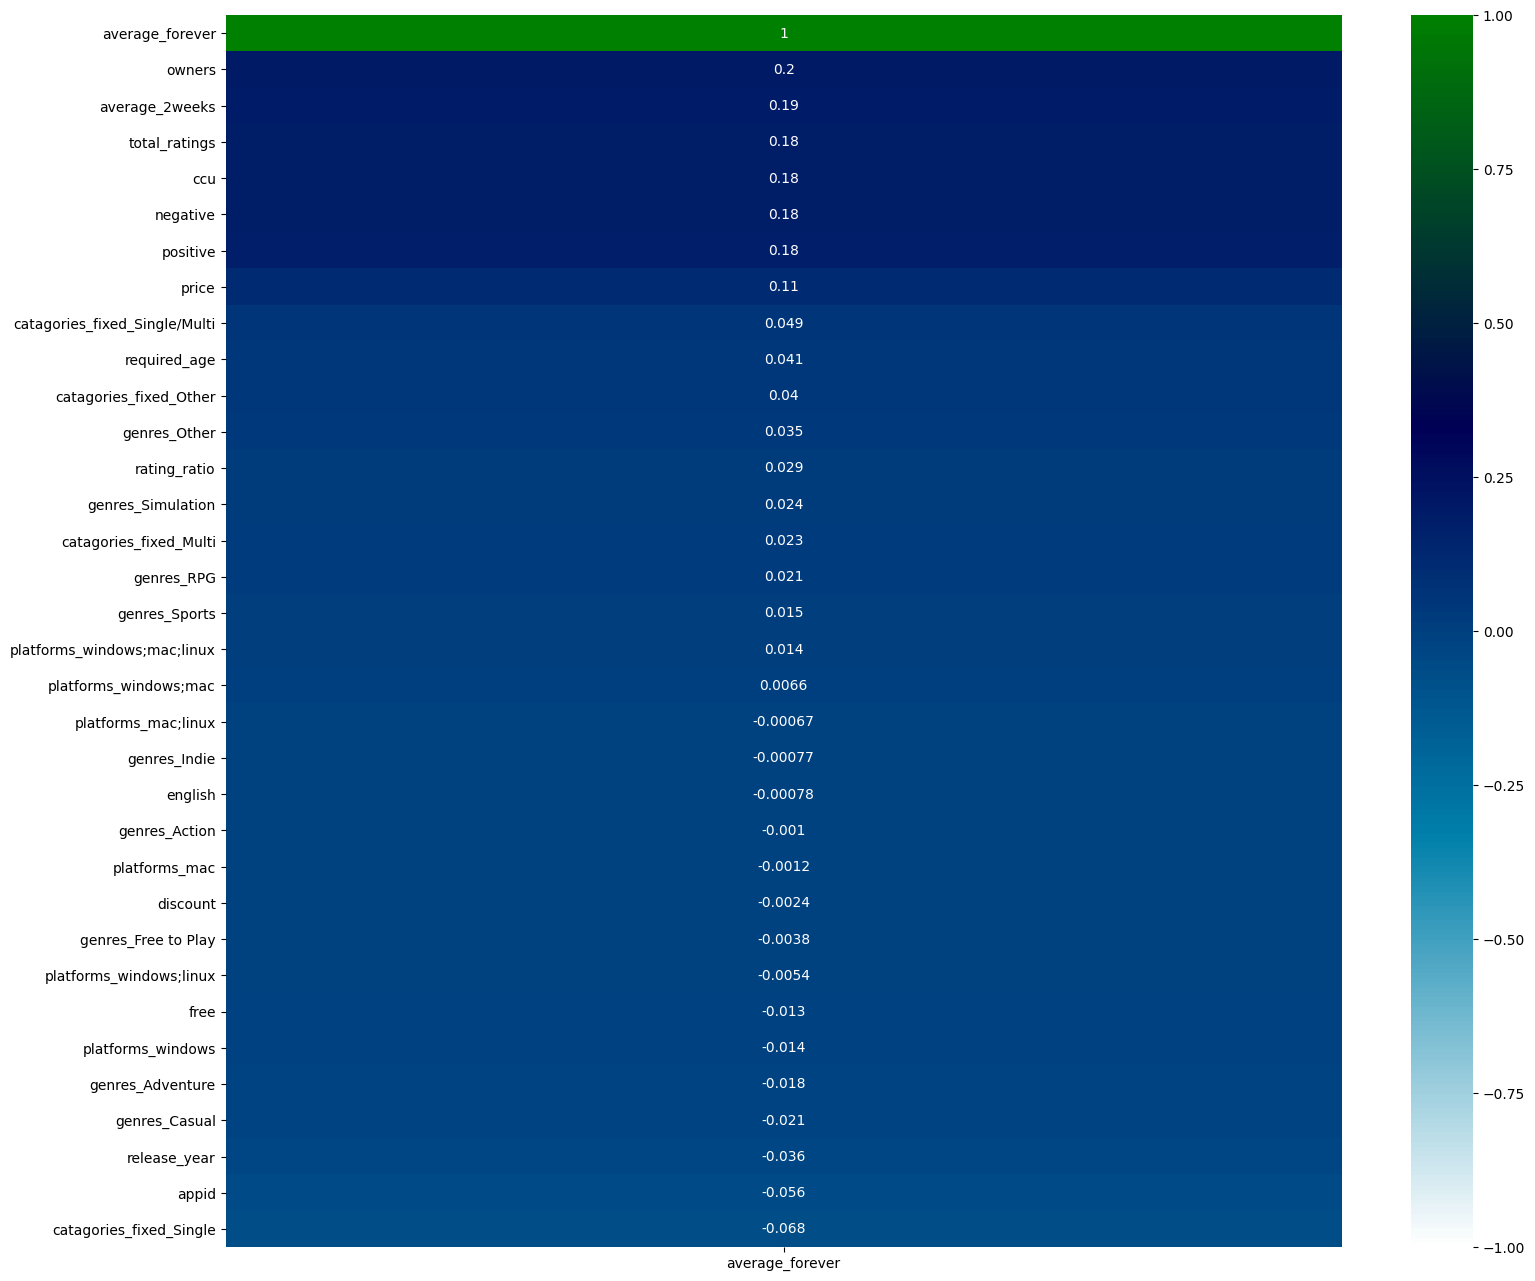

In [885]:
plt.figure(figsize=(18,16 ))
sns.heatmap(df2.corr()[['average_forever']].sort_values(by='average_forever', ascending=False), annot=True, vmin=-1, vmax=1, cmap='ocean_r');

## Price

In [886]:
df2['price'].value_counts().sort_values(ascending=False)

0.0       4811
999.0     2868
499.0     2519
99.0      2200
1499.0    1544
          ... 
2998.0       1
1104.0       1
833.0        1
56.0         1
624.0        1
Name: price, Length: 226, dtype: int64

<AxesSubplot:>

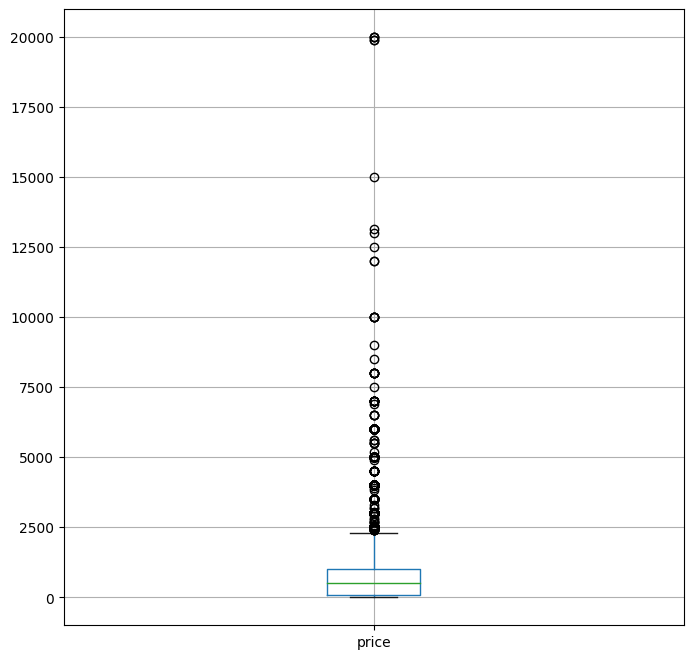

In [901]:
# Boxplot for Age
plt.figure(figsize=(8,8))
df2.boxplot('price')

In [898]:
# fining and dropping the outlier in price column 
index_names = df2[ df2['price'] == 39900.0 ].index 

In [899]:
df2.drop(index_names, inplace=True)

In [900]:
df2['price'].sort_values(ascending=False)

12455    19999.0
23569    19999.0
22504    19999.0
9805     19900.0
17038    19900.0
          ...   
18959        0.0
3803         0.0
3804         0.0
3805         0.0
12560        0.0
Name: price, Length: 25121, dtype: float64

In [920]:
df2['average_forever'].sort_values(ascending=False)

4710     228799
13064    136088
18819     61785
20190     45740
13159     45013
          ...  
16683         0
16684         0
16685         0
16686         0
12560         0
Name: average_forever, Length: 25121, dtype: int64

In [921]:
# Dropping the rows where average_forever is 0 (no accumulated average minutes)
index_name = df2[ df2['average_forever'] == 0].index 

In [923]:
df3 = df2.drop(index_name)

<AxesSubplot:>

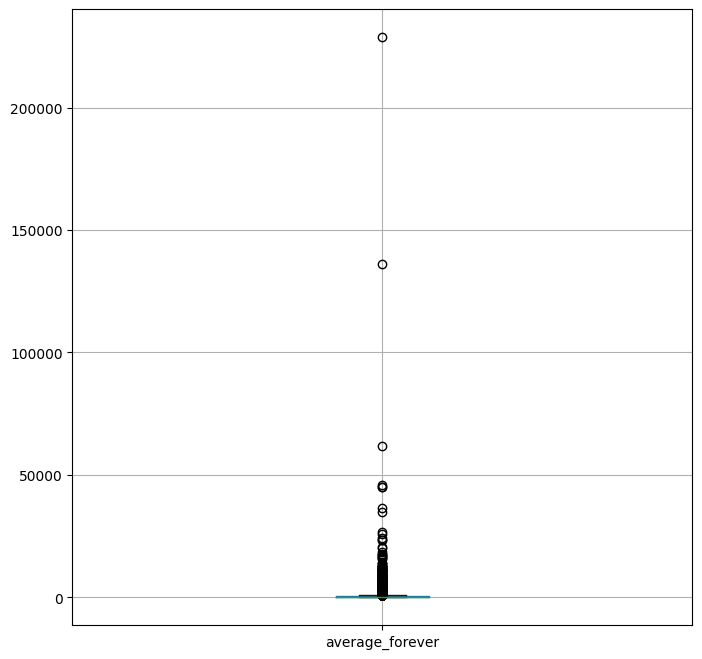

In [926]:
# Boxplot for Age
plt.figure(figsize=(8,8))
df3.boxplot('average_forever')

In [931]:
df4.drop(columns=['name', 'required_age', 'free', 'genres_Free to Play', 'publishers_fixed', 'developers_fixed', 'english', 'ccu', 'average_2weeks',
                 'discount'], inplace=True)

In [934]:
df4.drop(columns=['genres_Simulation', 'rating_ratio', 'release_year', 'platforms_windows;mac', 'platforms_windows', 'platforms_windows;linux',
                  'platforms_windows;mac;linux','platforms_mac', 'platforms_mac;linux'],inplace=True)

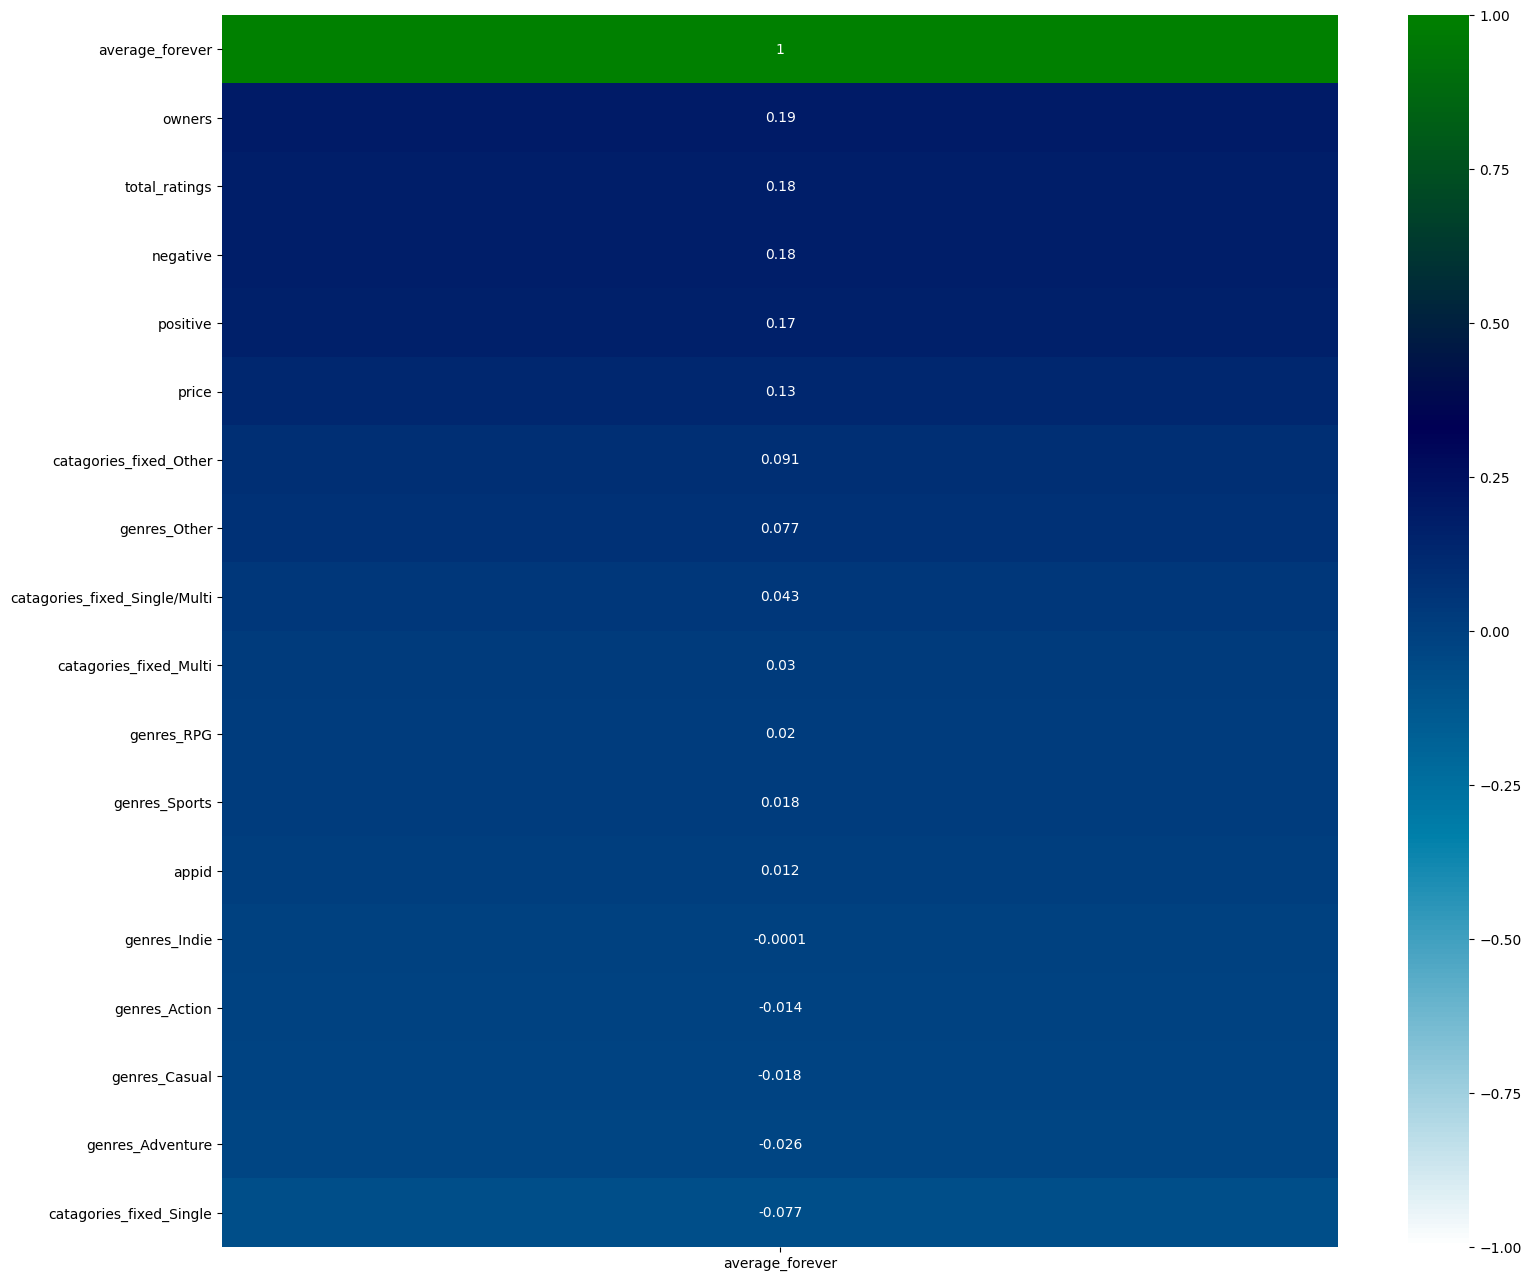

In [935]:
plt.figure(figsize=(18,16 ))
sns.heatmap(df4.corr()[['average_forever']].sort_values(by='average_forever', ascending=False), annot=True, vmin=-1, vmax=1, cmap='ocean_r');

In [936]:
df4.to_csv('model_4.csv',index=False)

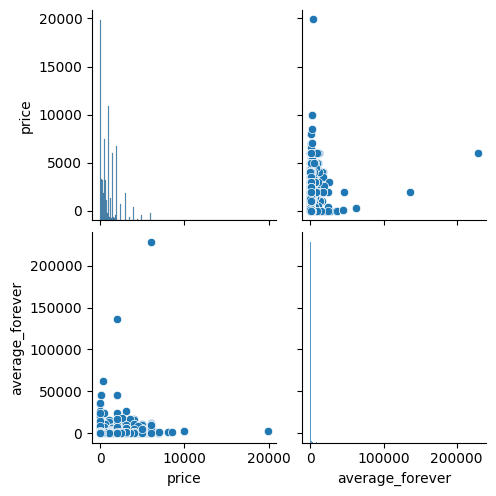

In [937]:
# Grabbing just the price and average forever
sns.pairplot(df4[['price', 'average_forever']]);